# Capstone Project
## Segment the audience of a content app based on its user’s propensity to watch a video in the next 2 days

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

sns.set(style="darkgrid")

# EDA for App Installed

In [2]:
df_applaunched = pd.read_csv("./Data/AppLaunched.csv")

In [3]:
list(df_applaunched)

['UserId',
 'Date',
 'Minute_Of_Day',
 'Second',
 'State',
 'Country',
 'Device',
 'OS']

[Text(0,0,'1'), Text(0,0,'40'), Text(0,0,'Unknown(255)')]

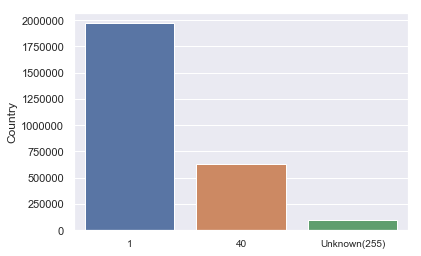

In [4]:
#Exploring the 'Country' column of AppLaunched Data.
df_applaunched_country = pd.DataFrame(df_applaunched['Country'].value_counts())
#Selecting only the country which have high counts of users launching the application
df_applaunched_country = df_applaunched_country[df_applaunched_country['Country']>50000]
#Visualizing using the bar plot
ax = sns.barplot(x=df_applaunched_country.index,y=df_applaunched_country['Country'])
ax.set_xticklabels(['1','40','Unknown(255)'], rotation='horizontal', fontsize=10)

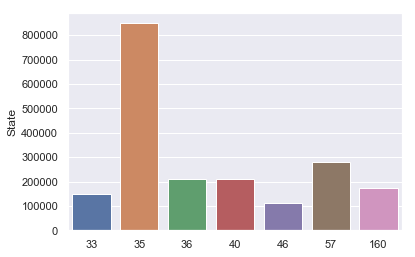

In [5]:
#Exploring the 'State' column of AppLaunched Data.
df_applaunched_state = pd.DataFrame(df_applaunched['State'].value_counts())
#Selecting only the states which have high counts of users launching the application
df_applaunched_state = df_applaunched_state[df_applaunched_state['State']>100000]
#Visualizing using the bar plot
ax = sns.barplot(x=df_applaunched_state.index,y=df_applaunched_state['State'])

[Text(0,0,'Desktop(0)'),
 Text(0,0,'Mobile(1)'),
 Text(0,0,'Tablet(2)'),
 Text(0,0,'TV(3)')]

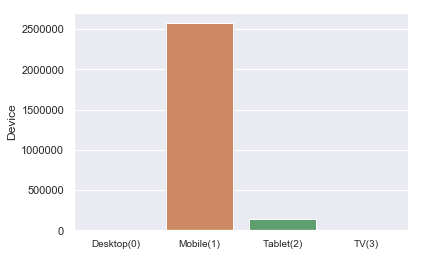

In [6]:
#Exploring the 'Device' column of AppLaunched Data.
df_applaunched_device = pd.DataFrame(df_applaunched['Device'].value_counts())
#Selecting only the devices which have high counts of users launching the application
df_applaunched_device = df_applaunched_device[df_applaunched_device['Device']>0]
#Visualizing using the bar plot
ax = sns.barplot(x=df_applaunched_device.index,y=df_applaunched_device['Device'])
ax.set_xticklabels(['Desktop(0)','Mobile(1)','Tablet(2)','TV(3)'], rotation='horizontal', fontsize=10)

[Text(0,0,'Others(0)'), Text(0,0,'Android(1)'), Text(0,0,'iOS(2)')]

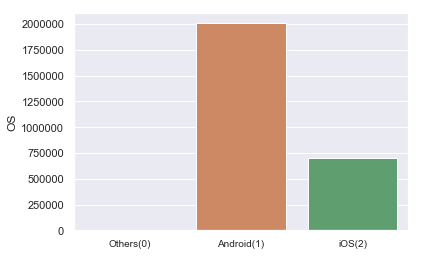

In [7]:
#Exploring the 'OS' column of AppLaunched Data.
df_applaunched_OS = pd.DataFrame(df_applaunched['OS'].value_counts())
#Selecting only the devices which have high counts of users launching the application
df_applaunched_OS = df_applaunched_OS[df_applaunched_OS['OS']>0]
#Visualizing using the bar plot
ax = sns.barplot(x=df_applaunched_OS.index,y=df_applaunched_OS['OS'])
ax.set_xticklabels(['Others(0)','Android(1)','iOS(2)'], rotation='horizontal', fontsize=10)

In [8]:
#Starting with date & time of day columns of AppLaunched data
#Splitting the date column into month & day
df_applaunched['Date_time'] = pd.to_datetime(df_applaunched['Date'],format="%Y%m%d")
df_applaunched['month'] = df_applaunched['Date_time'].dt.strftime('%b')
df_applaunched['day_of_month']= df_applaunched['Date_time'].dt.day

In [9]:
#Grouping by month & day, aggregating based on count for each day of each month
df_groupedby_month_and_day = df_applaunched.groupby(by=['month','day_of_month']).count().reset_index()

In [10]:
#df_groupedby_month_and_day

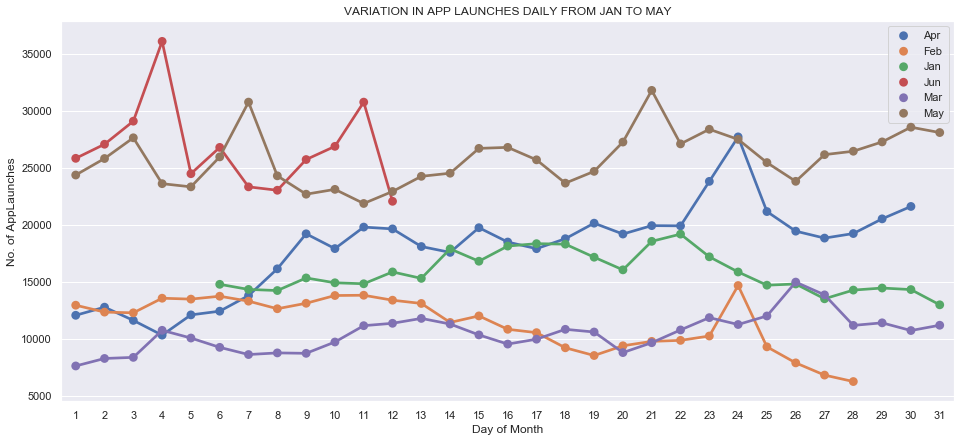

In [11]:
#Plotting the stacked line chart for each month
plt.figure(figsize=(16, 7))
sns.pointplot(x="day_of_month", y="UserId", hue="month", data=df_groupedby_month_and_day)
plt.xlabel("Day of Month")
plt.ylabel("No. of AppLaunches")
plt.title("VARIATION IN APP LAUNCHES DAILY FROM JAN TO MAY")
plt.legend(loc='upper right')

In [12]:
def make_timestamp(row):
    date_as_string = str(row['Date'])
    hour = str(row['Minute_Of_Day'] // (60))
    minute = str(row['Minute_Of_Day'] % 60)
    
    if len(hour) == 1:
        hour = '0' + hour
        
    if len(minute) == 1:
        minute = '0' + minute
    
    date_string = date_as_string[:4] + '-' + date_as_string[4:6] + '-' + date_as_string[6:] + ' ' + hour + ':' + minute
    datetime_object = datetime.strptime(date_string, '%Y-%m-%d %H:%M')
    return datetime_object

In [13]:
df_applaunched['TimeStamp'] = df_applaunched.apply(make_timestamp,axis=1)

In [37]:
df_applaunched['TimeStamp'].head()

0   2017-01-06
1   2017-01-06
2   2017-01-06
3   2017-01-06
4   2017-01-06
Name: TimeStamp, dtype: datetime64[ns]

# EDA for App Uninstalled

In [15]:
app_uninstalled_df = pd.read_csv('./Data/AppUninstalled.csv')

In [16]:
app_uninstalled_df["UserId"].value_counts().head()

93d087d8b7df56f94b963367c640d557    41
64baef3964258bdead9ed9e4a1df84dc    31
ebaed4942c8e92e124afbad8720e7021    20
00777fb8db3ca4b63736934f698d905e    19
931edc94a53bddd1ad54759242b6c19c    18
Name: UserId, dtype: int64

In [17]:
app_uninstalled_df["Date"].value_counts().head()

20170122    3288
20170605    3265
20170607    3160
20170522    3065
20170124    3059
Name: Date, dtype: int64

In [18]:
app_uninstalled_df["Minute_Of_Day"].value_counts().head()

178    9922
132    9440
174    9315
142    9090
124    8141
Name: Minute_Of_Day, dtype: int64

In [19]:
app_uninstalled_df["Second"].value_counts()

0    326684
Name: Second, dtype: int64

In [20]:
app_uninstalled_df["State"].value_counts().head()

35     81285
0      37630
40     25018
57     24382
160    24070
Name: State, dtype: int64

In [21]:
app_uninstalled_df["Country"].value_counts().head()

1      196884
40      88374
255     37425
14       1950
2         737
Name: Country, dtype: int64

In [22]:
app_uninstalled_df["Device"].value_counts()

1    308815
2     16025
0      1696
3       148
Name: Device, dtype: int64

In [23]:
app_uninstalled_df["OS"].value_counts()

1    310736
2     14618
0      1330
Name: OS, dtype: int64

In [24]:
app_uninstalled_df.dtypes

UserId           object
Date              int64
Minute_Of_Day     int64
Second            int64
State             int64
Country           int64
Device            int64
OS                int64
dtype: object

In [25]:
# Check for 0s in numerical columns

In [26]:
numeric_df = app_uninstalled_df._get_numeric_data()
numeric_df_is_zero = numeric_df.isin([0])

In [27]:
for column in numeric_df_is_zero.columns:
    print(column)
    print(numeric_df_is_zero[column].value_counts())
    print('________________________________')

Date
False    326684
Name: Date, dtype: int64
________________________________
Minute_Of_Day
False    326612
True         72
Name: Minute_Of_Day, dtype: int64
________________________________
Second
True    326684
Name: Second, dtype: int64
________________________________
State
False    289054
True      37630
Name: State, dtype: int64
________________________________
Country
False    326489
True        195
Name: Country, dtype: int64
________________________________
Device
False    324988
True       1696
Name: Device, dtype: int64
________________________________
OS
False    325354
True       1330
Name: OS, dtype: int64
________________________________


In [28]:
app_uninstalled_df.describe()

,Date,Minute_Of_Day,Second,State,Country,Device,OS
count,3.266840e+05,326684.000000,326684.0,326684.000000,326684.000000,326684.000000,326684.000000
mean,2.017035e+07,357.310704,0.0,41.461327,40.816655,1.044768,1.040675
std,1.648711e+02,401.987829,0.0,37.381092,78.878149,0.232493,0.217172
min,2.017011e+07,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,2.017021e+07,138.000000,0.0,33.000000,1.000000,1.000000,1.000000
50%,2.017040e+07,157.000000,0.0,35.000000,1.000000,1.000000,1.000000
75%,2.017051e+07,178.000000,0.0,43.000000,40.000000,1.000000,1.000000
max,2.017061e+07,1439.000000,0.0,252.000000,255.000000,3.000000,2.000000


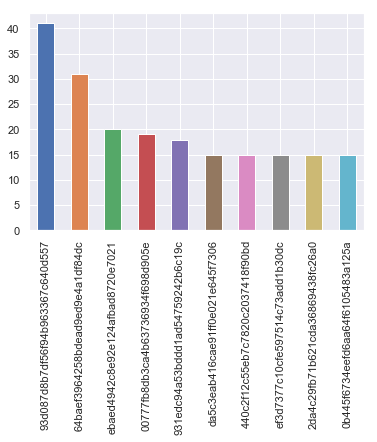

In [29]:
app_uninstalled_df["UserId"].value_counts().nlargest(10).plot(kind = "bar")

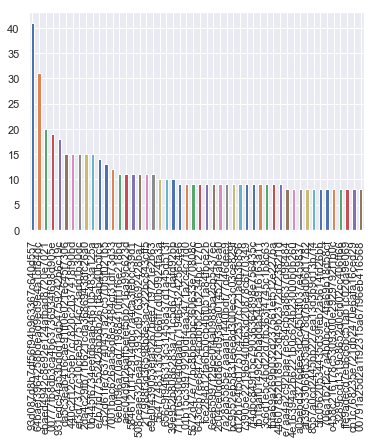

In [30]:
app_uninstalled_df["UserId"].value_counts().nlargest(50).plot(kind = "bar")

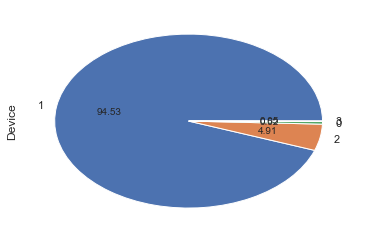

In [31]:
app_uninstalled_df["Device"].value_counts().plot.pie(autopct="%.2f")

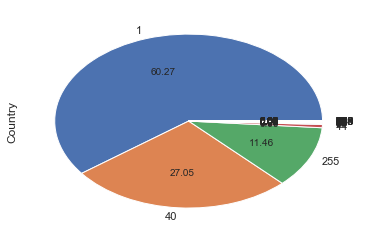

In [32]:
app_uninstalled_df["Country"].value_counts().plot.pie(autopct="%.2f")

/Users/Clyde/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


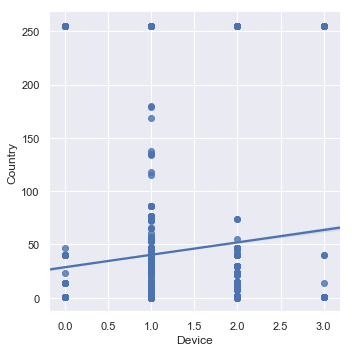

In [33]:
g = sns.lmplot("Device","Country",app_uninstalled_df)

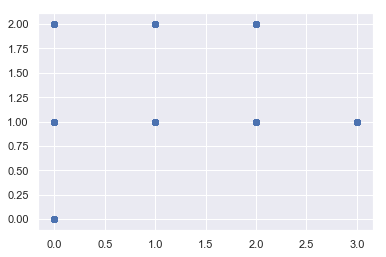

In [34]:
plt.scatter(app_uninstalled_df["Device"],app_uninstalled_df["OS"])

# Timestamp conversion for App Uninstalled Dataset

In [35]:
app_uninstalled_df['TimeStamp']= app_uninstalled_df["Date"].astype(str)+" "+(app_uninstalled_df['Minute_Of_Day']//60).astype(str) +":"+ (app_uninstalled_df['Minute_Of_Day']%60).astype(str)+ ":"+app_uninstalled_df["Second"].astype(str)

In [36]:
app_uninstalled_df['TimeStamp']=pd.to_datetime(app_uninstalled_df["TimeStamp"],format="%Y%m%d %H:%M:%S")
app_uninstalled_df["TimeStamp"].head()

0   2017-01-06 00:00:00
1   2017-01-06 00:00:00
2   2017-01-06 00:01:00
3   2017-01-06 00:01:00
4   2017-01-06 00:06:00
Name: TimeStamp, dtype: datetime64[ns]